<a href="https://colab.research.google.com/github/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/blob/main/code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)


df = pd.read_csv("https://raw.githubusercontent.com/costpetrides/Air-pollution-COVID-19-impact/refs/heads/main/Yearly/Data-Y/Patision.csv",
                 parse_dates=['DAY'],  # change to date time format
                 index_col="DAY")
df.head()

,SO2,O3,CO,NO,NO2,BEN
DAY,,,,,,
2018-01-01,13,19,3.300,243,67,14.110
2018-01-02,10,16,1.800,156,77,7.330
2018-01-03,10,16,1.800,144,75,6.770
2018-01-04,9,16,1.400,113,71,5.500
2018-01-05,15,17,2.600,203,91,9.550


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2018-01-01 to 2021-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SO2     1461 non-null   int64  
 1   O3      1461 non-null   int64  
 2   CO      1461 non-null   float64
 3   NO      1461 non-null   int64  
 4   NO2     1461 non-null   int64  
 5   BEN     1461 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 79.9 KB


In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SO2,1461.000,6.926,4.409,0.000,4.000,6.000,9.000,25.000
O3,1461.000,17.372,15.612,0.000,5.000,13.000,26.000,86.000
CO,1461.000,0.933,0.723,0.000,0.300,0.900,1.400,4.000
NO,1461.000,69.977,50.900,0.000,32.000,60.000,95.000,328.000
NO2,1461.000,70.535,21.532,0.000,55.000,71.000,86.000,136.000
BEN,1461.000,2.888,3.046,0.000,0.000,2.100,4.610,18.200


In [146]:
import plotly.express as px

# Mean Temperature Plot
fig_meantemp = px.line(df, x=df.index, y='SO2')
fig_meantemp.update_layout(template='plotly', title_x=0.5, xaxis_title="Date")
fig_meantemp.show()

# Humidity Plot
fig_humidity = px.line(df, x=df.index, y='O3')
fig_humidity.update_layout(template='plotly', title_x=0.5, xaxis_title="Date")
fig_humidity.show()

# Wind Speed Plot
fig_wind_speed = px.line(df, x=df.index, y='CO')
fig_wind_speed.update_layout(template='plotly', title_x=0.5, xaxis_title="Date")
fig_wind_speed.show()

# Mean Pressure Plot
fig_meanpressure = px.line(df, x=df.index, y='NO')
fig_meanpressure.update_layout(template='plotly', title_x=0.5, xaxis_title="Date")
fig_meanpressure.show()

# Mean Pressure Plot
fig_meanpressure = px.line(df, x=df.index, y='NO2')
fig_meanpressure.update_layout(template='plotly', title_x=0.5, xaxis_title="Date")
fig_meanpressure.show()

# Mean Pressure Plot
fig_meanpressure = px.line(df, x=df.index, y='BEN')
fig_meanpressure.update_layout(template='plotly', title_x=0.5, xaxis_title="Date")
fig_meanpressure.show()

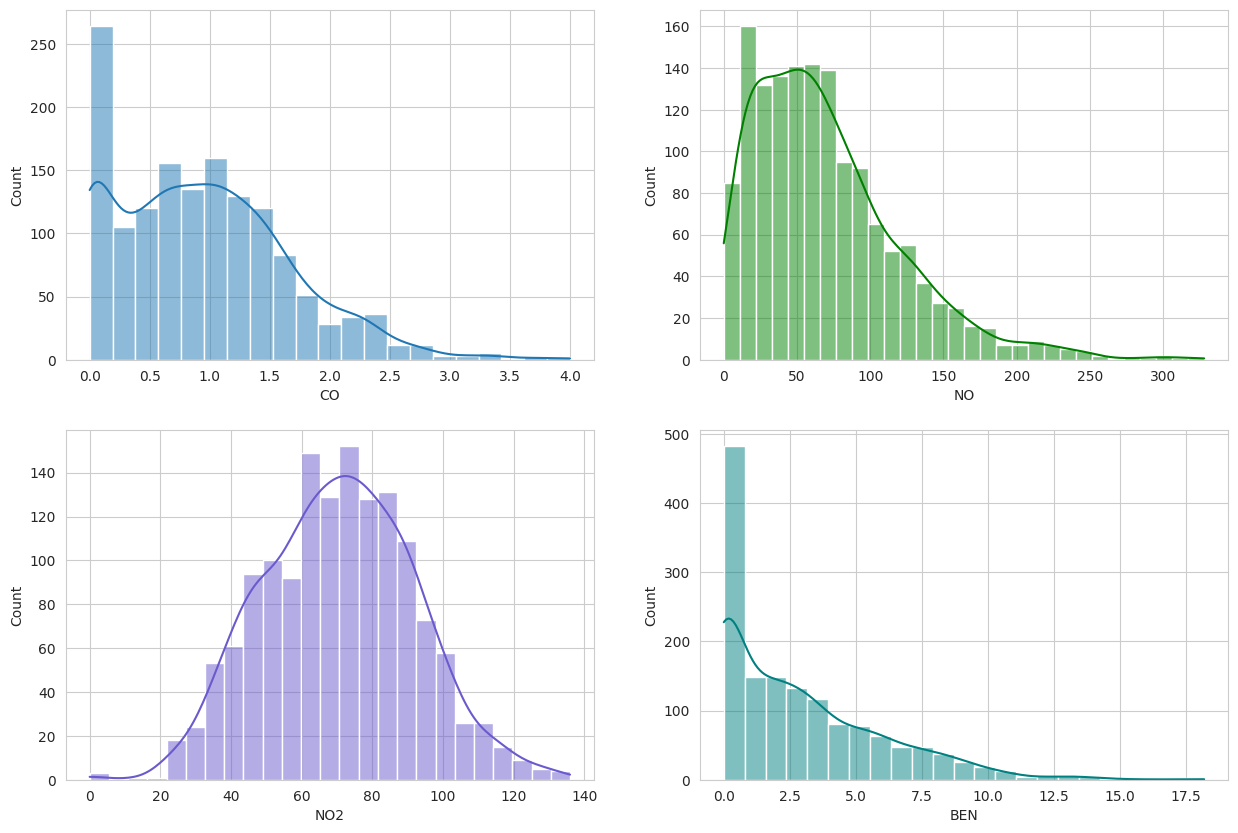

In [147]:
# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot histograms with KDE
sns.histplot(data=df, x="CO", ax=ax[0][0], kde=True)

sns.histplot(data=df, x="NO", ax=ax[0][1], kde=True, color='green')

sns.histplot(data=df, x="NO2", ax=ax[1][0], kde=True, color='slateblue')

sns.histplot(data=df, x="BEN", ax=ax[1][1], kde=True, color='teal')

# Show the plot
plt.show()

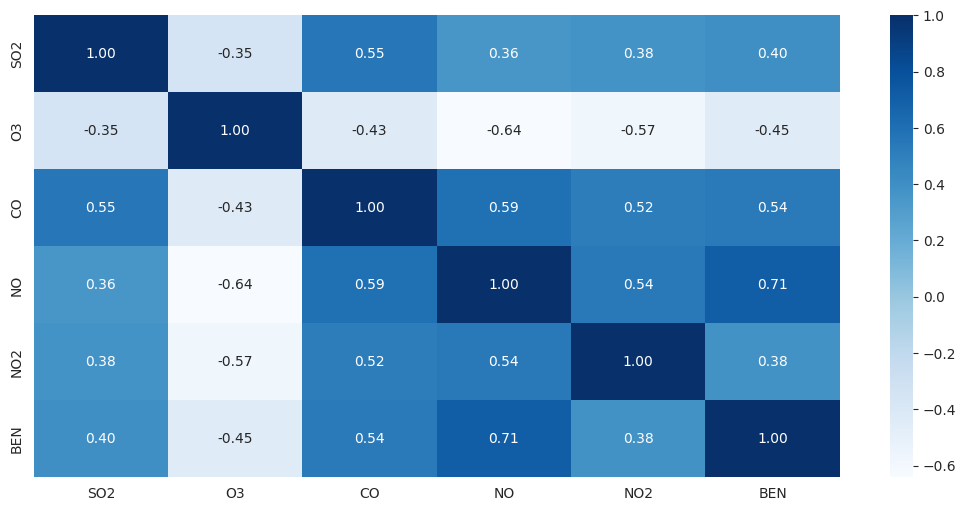

In [148]:
plt.figure(figsize=(13, 6))
sns.heatmap(df.select_dtypes('number').corr(), cmap='Blues', annot=True, fmt='.2f');

In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
import plotly.subplots as sp

# Perform seasonal decomposition
result = seasonal_decompose(df['NO'], model='additive', period=365)

# Create subplots for the decomposed components
fig = sp.make_subplots(
    rows=4, cols=1, shared_xaxes=True,
    subplot_titles=['Observed', 'Trend', 'Seasonal', 'Residual']
)

# Add traces for each component
fig.add_trace(go.Scatter(x=df.index, y=result.observed, mode='lines', name='Observed'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.trend, mode='lines', name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.seasonal, mode='lines', name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.resid, mode='lines', name='Residual'), row=4, col=1)

# Update layout with the correct template
fig.update_layout(
    template='plotly',
    height=800,
    title='O3',
    title_x=0.5
)

# Show the figure
fig.show()

In [198]:
df = df[['CO', 'NO', 'NO2', 'O3']]
df.head()

,CO,NO,NO2,O3
DAY,,,,
2018-01-01,3.300,243,67,19
2018-01-02,1.800,156,77,16
2018-01-03,1.800,144,75,16
2018-01-04,1.400,113,71,16
2018-01-05,2.600,203,91,17


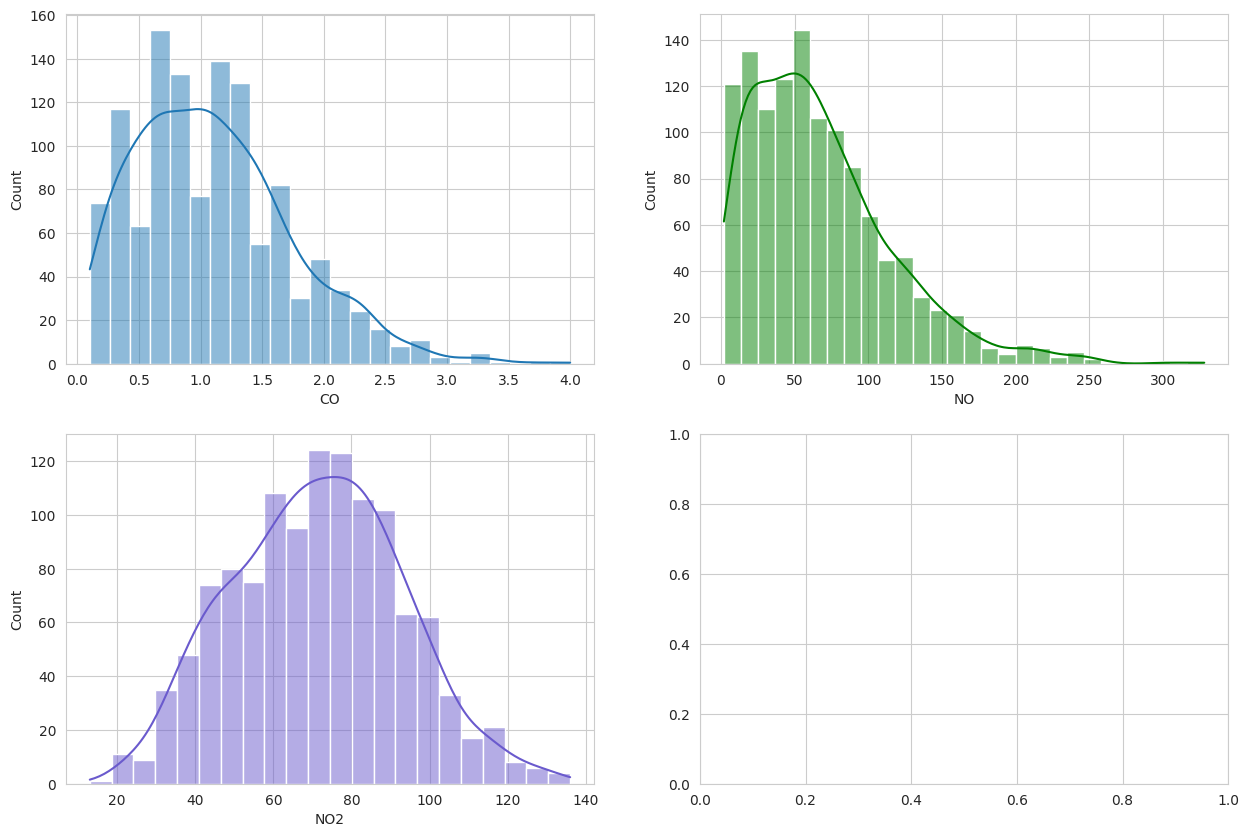

In [200]:
import pandas as pd

# Assuming df is your DataFrame
df = df[(df != 0).all(axis=1)]

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot histograms with KDE
sns.histplot(data=df, x="CO", ax=ax[0][0], kde=True)

sns.histplot(data=df, x="NO", ax=ax[0][1], kde=True, color='green')

sns.histplot(data=df, x="NO2", ax=ax[1][0], kde=True, color='slateblue')

# Show the plot
plt.show()

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

In [201]:
train_size = int(len(df) * 0.8)
dl_train, dl_test = df.iloc[:train_size], df.iloc[train_size:]
print(f"Train - dataset size: {len(dl_train):.2f}")
print(f"Test - dataset size: {len(dl_test):.2f}")

Train - dataset size: 964.00
Test - dataset size: 241.00


In [203]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
target_transformer = MinMaxScaler()

dl_train['CO'] = robust_scaler.fit_transform(dl_train[['CO']])
dl_train['NO'] = robust_scaler.fit_transform(dl_train[['NO']])
dl_train['NO2'] = robust_scaler.fit_transform(dl_train[['NO2']])
dl_train['O3'] = target_transformer.fit_transform(dl_train[['O3']]) # target

dl_test['CO'] = robust_scaler.fit_transform(dl_test[['CO']])
dl_test['NO'] = robust_scaler.fit_transform(dl_test[['NO']])
dl_test['NO2'] = robust_scaler.fit_transform(dl_test[['NO2']])
dl_test['O3'] = target_transformer.fit_transform(dl_test[['O3']]) # target

In [204]:
! pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [206]:
sequence_length = 4
X_train, y_train = create_dataset(dl_train, dl_train['O3'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['O3'], sequence_length)

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(100, activation='tanh', recurrent_activation='relu', input_shape=(sequence_length, X_train.shape[2])))
gru_model.add(Dense(1, activation='relu'))  # Applying ReLU to the Dense layer output
gru_model.compile(optimizer='adam', loss='mse')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = gru_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = gru_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')


Epoch 1/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0396 - val_loss: 0.0320
Epoch 2/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.0257 - val_loss: 0.0275
Epoch 3/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0285 - val_loss: 0.0299
Epoch 4/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0257 - val_loss: 0.0286
Epoch 5/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0265 - val_loss: 0.0272
Epoch 6/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0266 - val_loss: 0.0274
Epoch 7/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0245 - val_loss: 0.0285
Epoch 8/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0253 - val_loss: 0.0286
Epoch 9/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0219 - val_loss: 0.0272
Epoch 10/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0237 - val_loss: 0.0308
Epoch 11/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0224 - val_loss: 0.0290
Epoch 12/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8m

In [208]:
gru_model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_14 (GRU)                         │ (None, 100)                 │          31,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [209]:
gru_pred = gru_model.predict(X_test)
gru_pred = target_transformer.inverse_transform(gru_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step


RMSE: 0.16497289569175505
R2 Score: 0.5091024691988999


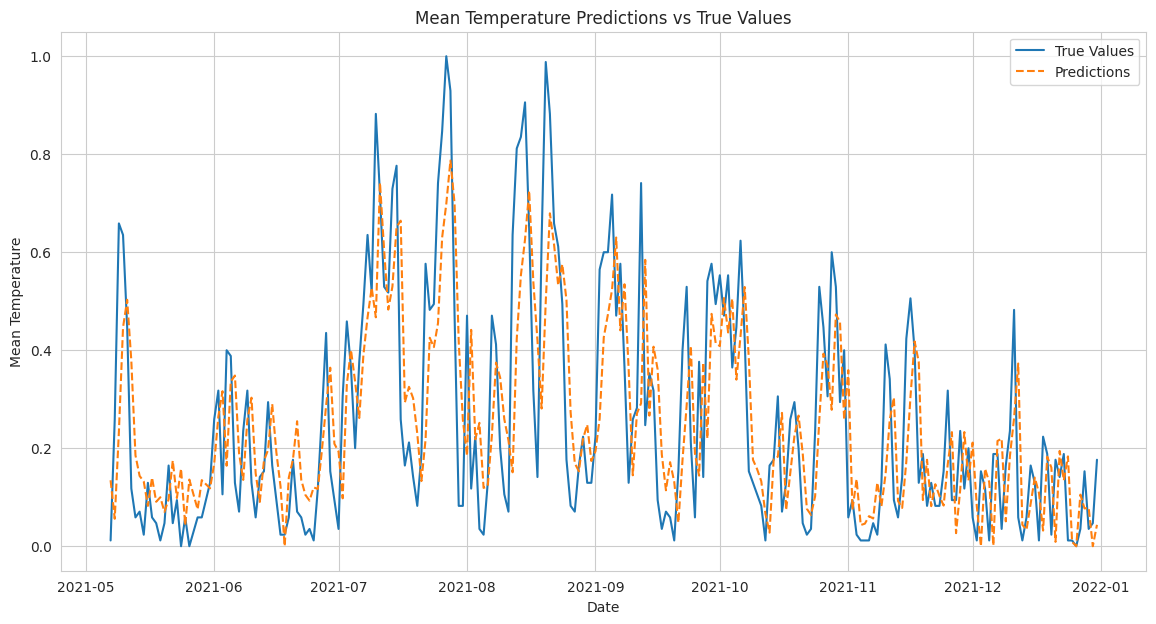

In [210]:
# Calculate RMSE and R2 scores
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, gru_pred))
r2 = r2_score(y_test, gru_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], gru_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

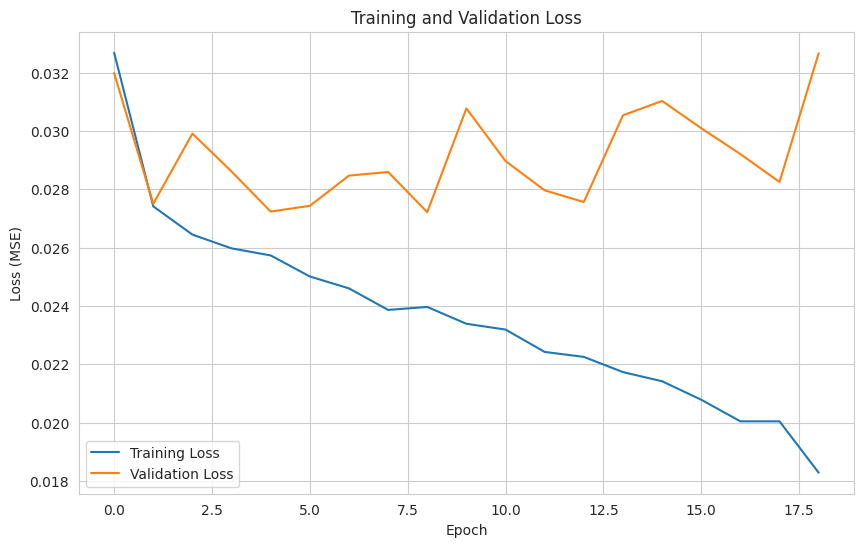

In [211]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [213]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
lstm_model.add(Dense(1, activation='relu'))  # Applying ReLU to the Dense layer output
lstm_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = lstm_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')


Epoch 1/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0393 - val_loss: 0.0303
Epoch 2/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0257 - val_loss: 0.0276
Epoch 3/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0254 - val_loss: 0.0285
Epoch 4/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0260 - val_loss: 0.0346
Epoch 5/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0276 - val_loss: 0.0263
Epoch 6/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0256 - val_loss: 0.0296
Epoch 7/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0237 - val_loss: 0.0272
Epoch 8/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0241 - val_loss: 0.0279
Epoch 9/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0230 - val_loss: 0.0281
Epoch 10/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0240 - val_loss: 0.0266
Epoch 11/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0238 - val_loss: 0.0274
Epoch 12/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8m

In [214]:
lstm_pred = lstm_model.predict(X_test)
lstm_pred = target_transformer.inverse_transform(lstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [215]:
lstm_model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100)                 │          42,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,305 (493.38 KB)

 Trainable params: 42,101 (164.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84,204 (328.93 KB)

RMSE: 0.16226113090912267
R2 Score: 0.5251082227447142


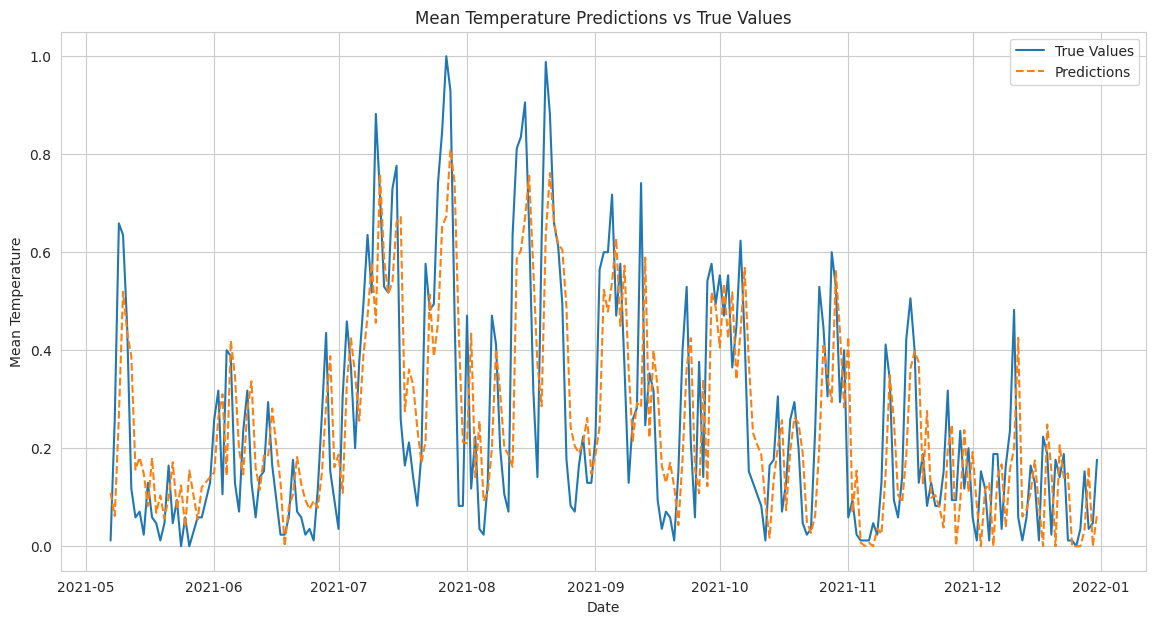

In [216]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
r2 = r2_score(y_test, lstm_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], lstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()


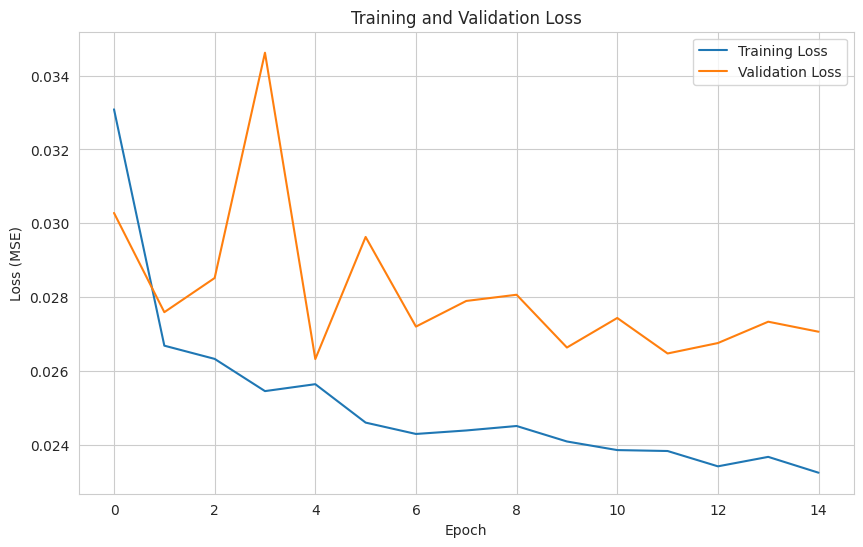

In [217]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [218]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2]))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')


Epoch 1/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - loss: 0.0420 - val_loss: 0.0292
Epoch 2/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 0.0281 - val_loss: 0.0273
Epoch 3/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.0249 - val_loss: 0.0282
Epoch 4/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0269 - val_loss: 0.0293
Epoch 5/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0279 - val_loss: 0.0262
Epoch 6/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0246 - val_loss: 0.0266
Epoch 7/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0228 - val_loss: 0.0266
Epoch 8/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.0239 - val_loss: 0.0266
Epoch 9/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0230 - val_loss: 0.0259
Epoch 10/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0242 - val_loss: 0.0281
Epoch 11/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0236 - val_loss: 0.0262
Epoch 12/30
960/960 ━━━━━━━━━━━━━━━━

In [219]:
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_7 (Bidirectional)      │ (1, 200)                    │          84,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (1, 1)                      │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,605 (986.74 KB)

 Trainable params: 84,201 (328.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 168,404 (657.83 KB)

In [220]:
# Make predictions
bilstm_pred = model.predict(X_test)
bilstm_pred = target_transformer.inverse_transform(bilstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


RMSE: 0.16083951462467874
R2 Score: 0.5333930959856488


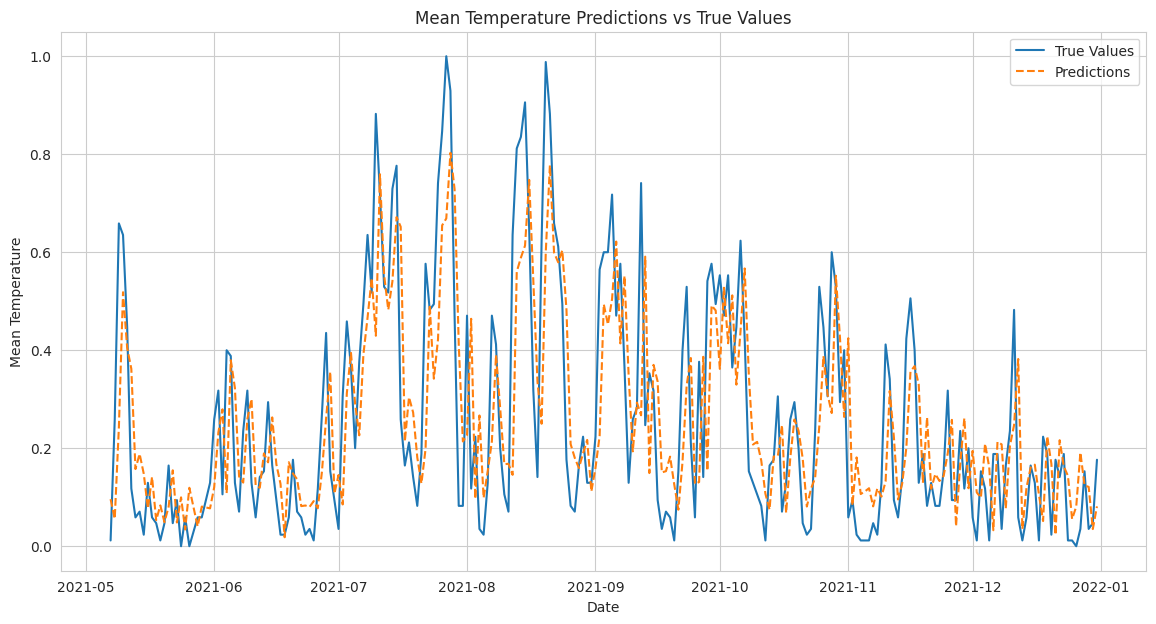

In [221]:
rmse = np.sqrt(mean_squared_error(y_test, bilstm_pred))
r2 = r2_score(y_test, bilstm_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], bilstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

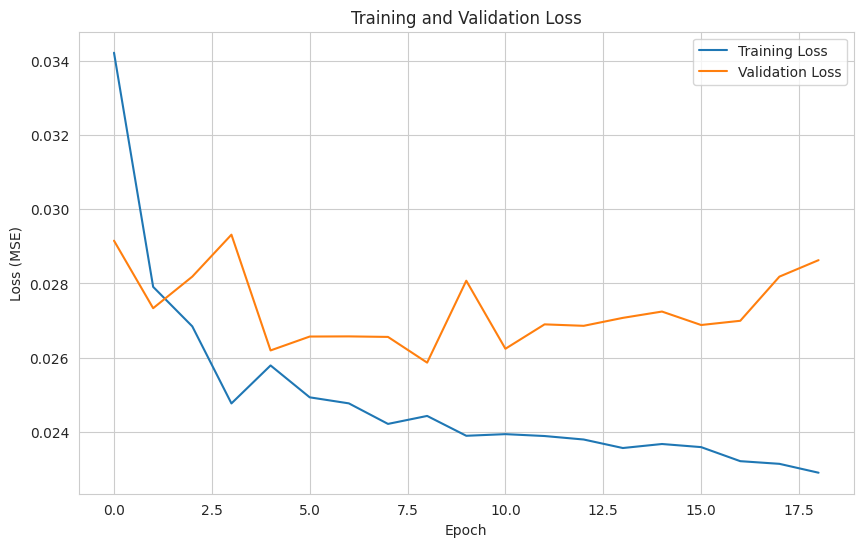

In [222]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [247]:
# Lets make some predictions !
rnn_pred = rnn_model.predict(X_test)
rnn_pred = target_transformer.inverse_transform(rnn_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


In [248]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, rnn_pred))
r2 = r2_score(y_test, rnn_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 0.16114960244215257
R2 Score: 0.5315921878905518


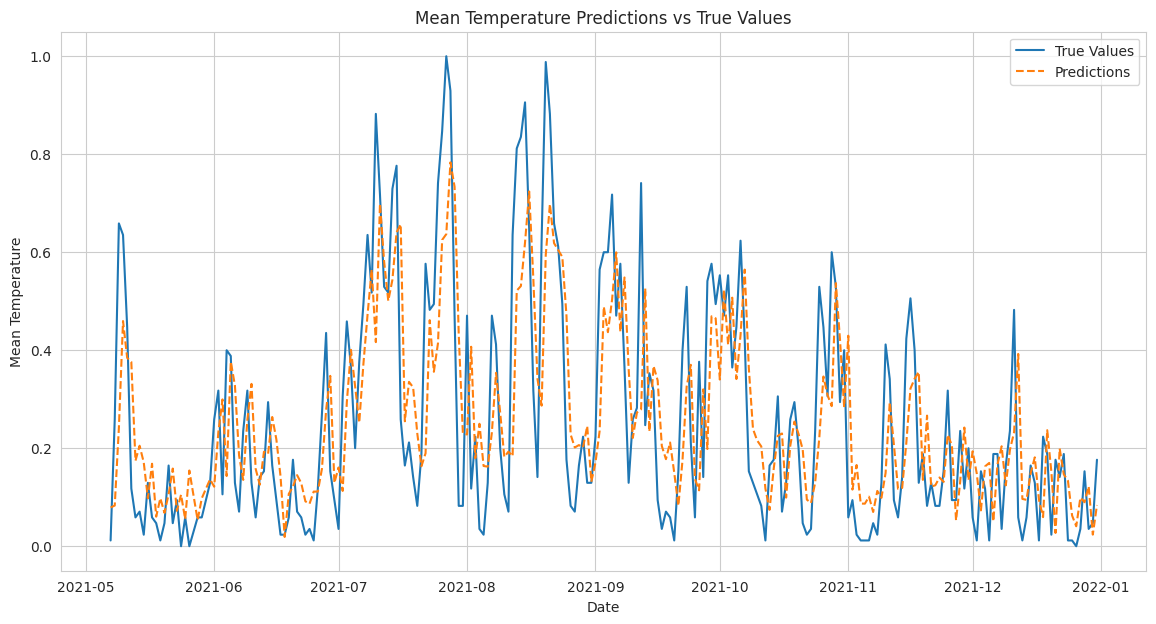

In [249]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], rnn_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

In [240]:
rnn_model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_17 (GRU)                         │ (None, 4, 100)              │          31,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_18 (GRU)                         │ (None, 50)                  │          22,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,955 (640.45 KB)

 Trainable params: 54,651 (213.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 109,304 (426.97 KB)

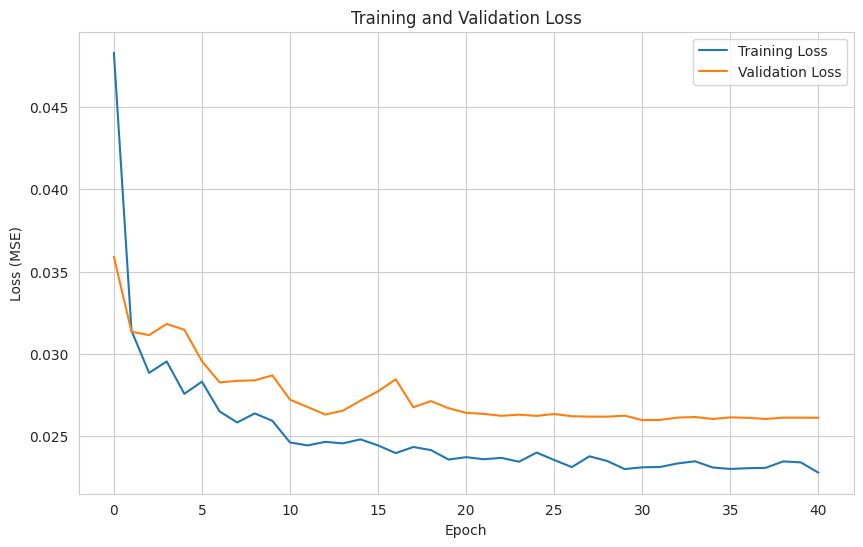

In [250]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()